In [16]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid



class greenAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
        #Number of waste stocked  
        self.WasteCount = 0
        #Position
        self.pos = (0,0)
        
        
        self.knowledge = {
            "wasteCount": 0,
            "wasteType": 1
        }
        
    def update(self, knowledge, percepts):
        return knowledge
    
    def deliberate(self, knowledge):
        return "move"
    
    
        
        
        
    def move(self,model):
        
        x, y = self.pos
        
        possible_positions = model.grid.get_neighborhood( (x, y), moore=True, include_center=False )
       
        # moving an agent to a random position in this list is then easy:
        new_position = model.random.choice(possible_positions)

        model.grid.move_agent(self, new_position)
        
    def step(self):
        #... define the perception-deliberation-action loop here ...
        
        percepts = {"nada" : 0}
        self.update(self.knowledge, percepts)
        action = self.deliberate(self.knowledge)
        percepts = self.model.do(self, action)
        print(f"Agent {self.unique_id} has value {self.knowledge.get('wasteCount')}")   
        


class NuclearWaste(Agent):
    def __inti__(self, unique_id, model):
        super().__init__(unique_id, model)
        
        # Waste type
        
        #Position
        self.pos = (0,0)
        
    def step(self):
        #... define the perception-deliberation-action loop here ...
        
        print("Not collected yet")
        
            
            
class WasteModelGrid(Model):
    def __init__(self, N, width, height):
        super().__init__()

        # we need a scheduler
        self.num_agents = N
        self.scheduler = RandomActivation(self)
        self.grid = MultiGrid(width, height, torus = 1)
        
        for i in range(N):
            a = greenAgent(i,self)
            self.scheduler.add(a)
            
            x = self.random.randint(0,width-1)
            y = self.random.randint(0, height-1)
            self.grid.place_agent(a, (x,y))
            
            
    def do(self, agent, action):
        if action == "move":
            agent.move(self)
        return {"nada": 0}
            



    def one_step(self):
        for agent in self.scheduler.agents:
                
                # Move agent

                agent.move(self)

                # Check for cellmates

                cellmates = self.grid.get_cell_list_contents([agent.pos]) 
                


        self.scheduler.step()

    def run_n_steps(self,n):
        for _ in range(n):
            self.one_step()

In [17]:
model = WasteModelGrid(20,10,10) 
#TO COMPLETE  # 20 agents in our example
model.run_n_steps(10)  #

Agent 17 has value 0
Agent 1 has value 0
Agent 16 has value 0
Agent 14 has value 0
Agent 7 has value 0
Agent 4 has value 0
Agent 6 has value 0
Agent 0 has value 0
Agent 13 has value 0
Agent 2 has value 0
Agent 11 has value 0
Agent 12 has value 0
Agent 19 has value 0
Agent 3 has value 0
Agent 10 has value 0
Agent 15 has value 0
Agent 5 has value 0
Agent 9 has value 0
Agent 8 has value 0
Agent 18 has value 0
Agent 0 has value 0
Agent 3 has value 0
Agent 14 has value 0
Agent 15 has value 0
Agent 10 has value 0
Agent 1 has value 0
Agent 13 has value 0
Agent 16 has value 0
Agent 2 has value 0
Agent 19 has value 0
Agent 18 has value 0
Agent 17 has value 0
Agent 12 has value 0
Agent 8 has value 0
Agent 4 has value 0
Agent 5 has value 0
Agent 7 has value 0
Agent 9 has value 0
Agent 11 has value 0
Agent 6 has value 0
Agent 19 has value 0
Agent 11 has value 0
Agent 9 has value 0
Agent 1 has value 0
Agent 12 has value 0
Agent 2 has value 0
Agent 16 has value 0
Agent 8 has value 0
Agent 17 has val

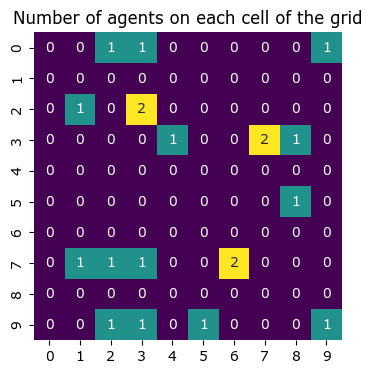

In [18]:
import seaborn as sns
import numpy as np


agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
   

# Plot using seaborn
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");

<Axes: >

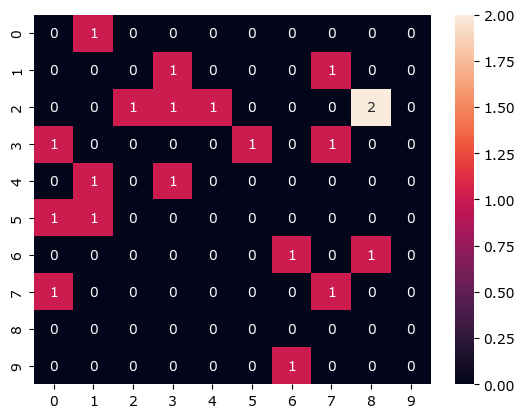

In [4]:
sns.heatmap(agent_counts, annot = True)
